<a href="https://colab.research.google.com/github/Abhishek-IITH/Projects/blob/main/RotaVirus_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

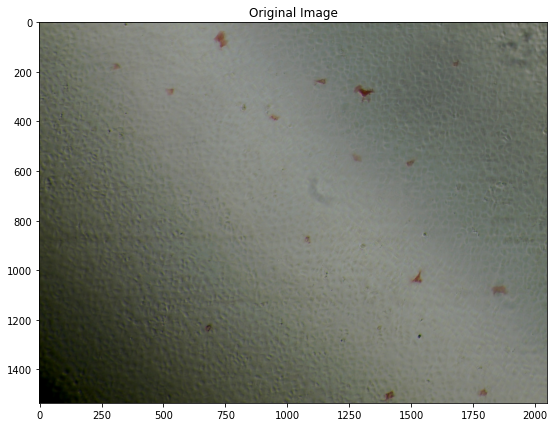

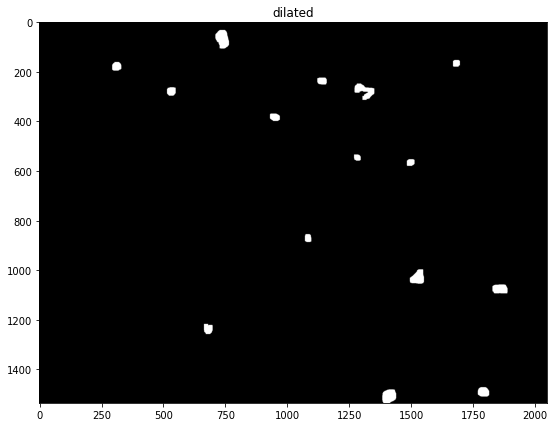


 Number of Rota-Viruses in the image :  15


In [ ]:
#importing the required libraries:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils

#---------------------------- ALL THE REQUIRED IMAGE PROCESSING FUNCTIONS ---------------------------------

def view(img,caption):
  seperator = np.ones((img.shape[0],50))*255
  plt.figure(figsize=(14,7))
  plt.imshow(img,cmap="gray")
  plt.title(caption)
  plt.show()

def readimg(path):
  cellImg_color1 = cv.imread(path,cv.IMREAD_COLOR) 
  cellImg_color = cv.cvtColor(cellImg_color1, cv.COLOR_BGR2RGB)
  view(cellImg_color,"Original Image") 
  return cellImg_color

def color2gray(img):
  cellImg_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  #view(cellImg_gray,"Grayscale Image") 
  return cellImg_gray

def Hist_eq(img):
  global HistEqimg
  HistEqimg = cv.equalizeHist(img)
  #view(HistEqimg,"After Histogram equalization on grayscale image")
  return HistEqimg

def change_constrast(img,Contrast,Brightness):
  inc_const = cv.convertScaleAbs(img, alpha=Contrast, beta=Brightness)
  #view(inc_const, "After adjusting constrast")
  return inc_const

def denoise_color(img,h,hcolor):
  denoised = cv.fastNlMeansDenoisingColored(img,None,h,hcolor,7,21)
  #view(denoised, "Denoised")
  return denoised

def color_filter(img,h1,s1,v1,h2,s2,v2):
  hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
  lower = np.array([h1, s1, v1])
  upper = np.array([h2, s2, v2])
  mask = cv.inRange(hsv, lower, upper)
  cfiltered = cv.bitwise_and(img, img, mask = mask)
  #view(cfiltered,"filtered by color")
  return cfiltered

def thresholding(img,l,h):
  image_thresh = np.ones(img.shape) * 0
  image_thresh[img<l] = 255
  image_thresh[img>h] = 255
  #view(image_thresh,"thresholded")
  return image_thresh

def morph(img,kernel_size):
  kernel = np.ones((kernel_size,kernel_size),np.uint8)
  opening = cv.morphologyEx(img,cv.MORPH_OPEN,kernel) 
  #view(opening,"Morphed")
  return opening

def dilateImg(img,kernel_size):
  kernel = np.ones((kernel_size,kernel_size),np.uint8)
  dilated = cv.dilate(img,kernel) 
  view(dilated,"dilated")
  return dilated

#---------------MAIN COUNTING FUNCTION-----------------------

def find_count(path):
    cellImg_color = readimg(path)
    cellImg_gray = color2gray(cellImg_color)
    denoised = denoise_color(cellImg_color,30,30)
    inc_const = change_constrast(denoised,1.31,-17)
    cfiltered = color_filter(inc_const,0,40,0,28,255,255)
    cfiltered_gray = color2gray(cfiltered)
    image_thresh = thresholding(cfiltered_gray,0,54)
    opening = morph(image_thresh,7)
    dilated = dilateImg(opening,9)
    dilated = np.uint8(dilated)
    cnts = cv.findContours(dilated.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print("\n Number of Rota-Viruses in the image : ",len(cnts))
    

#-----------------ENTER THE IMAGE HERE >>>>>> ------------------------------
find_count(r"/content/QS_2565.jpg")



